# Problem Statement:

** To predict housing prices based on the given attributes.* **

Steps:
1. Acquire data
2. Clean data
3. Exploratory Data Analysis
4. Standardise data
5. Split data into Train & Test sets
6. Create & Train Model
7. Model Evaluation

# Data Source:

**SKlearn datasets: Boston Housing Prices dataset**

# Data Dictionary:

The Boston housing dataset has **506 rows**(samples/observations) and **14 columns**(attributes).

**Predictor/Explanatory/Independent Variables**

**crim** - per capita crime rate by town. (crime rate)

**zn** - proportion of residential land zoned for lots over 25,000 sq.ft. 

**indus** - proportion of non-retail business acres per town. (industrial area)

**chas** - Charles River dummy variable (= 1 if tract bounds river; 0 otherwise). (water-bodies)

**nox** - nitrogen oxides concentration (parts per 10 million). (air pollution)

**rm** - average number of rooms per dwelling. (no. of rooms)

**age** - proportion of owner-occupied units built prior to 1940.

**dis** - weighted mean of distances to five Boston employment centres. (distance from offices)

**rad** - index of accessibility to radial highways. (accessibility to highways)

**tax** - full-value property-tax rate per $10,000.

**ptratio** - pupil-teacher ratio by town. (schools)

**black** - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town. (Black population)

**lstat** - lower status of the population (percent).

**Target/Response/Dependent Variable**

**medv** - *median value of owner-occupied homes(in $1000s)*  

# Import Libraries

In [1]:
# Pandas is a package for data manipulation and analysis
import pandas as pd

# Numpy is a package for scientific computing (multi-dimensional arrays, matrices, mathematical functions)
import numpy as np

# Data visualization library
import matplotlib.pyplot as plt

# Seaborn is a Python data visualization library for statistical graphics
import seaborn as sns

# Magic function which displays plots directly below the code cell in jupyter notebook
%matplotlib inline

# Acquire Data

In [2]:
from sklearn.datasets import load_boston

boston = load_boston()

# dictionary with key:value pairs
boston.keys()


dict_keys(['data', 'target', 'feature_names', 'DESCR'])

In [3]:
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [4]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [5]:
boston_df = pd.DataFrame(boston.data)

In [6]:
boston_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [7]:
boston_df.columns = boston.feature_names

In [8]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [9]:
boston_df['PRICE'] = boston.target

In [10]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [11]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
PRICE      506 non-null float64
dtypes: float64(14)
memory usage: 55.4 KB


# Summary Statistics

In [12]:
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [13]:
boston_df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'PRICE'],
      dtype='object')

# Exploratory Data Analysis

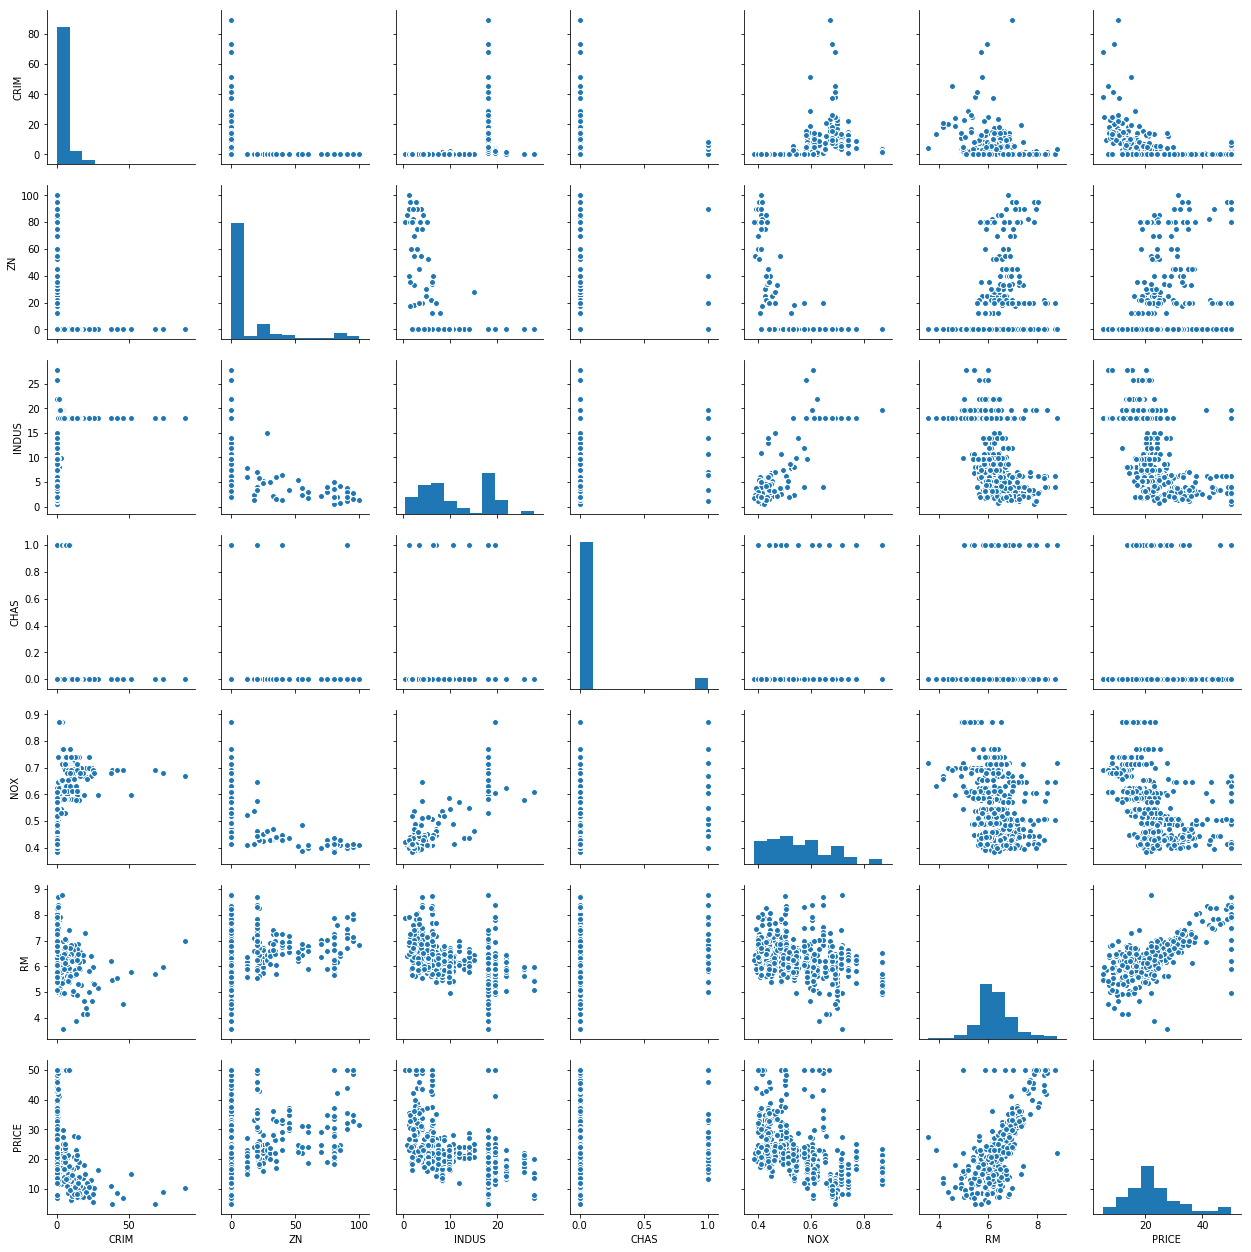

In [14]:
# To understand the correlation between Independent and Dependent variables

sns.pairplot(boston_df[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'PRICE']])

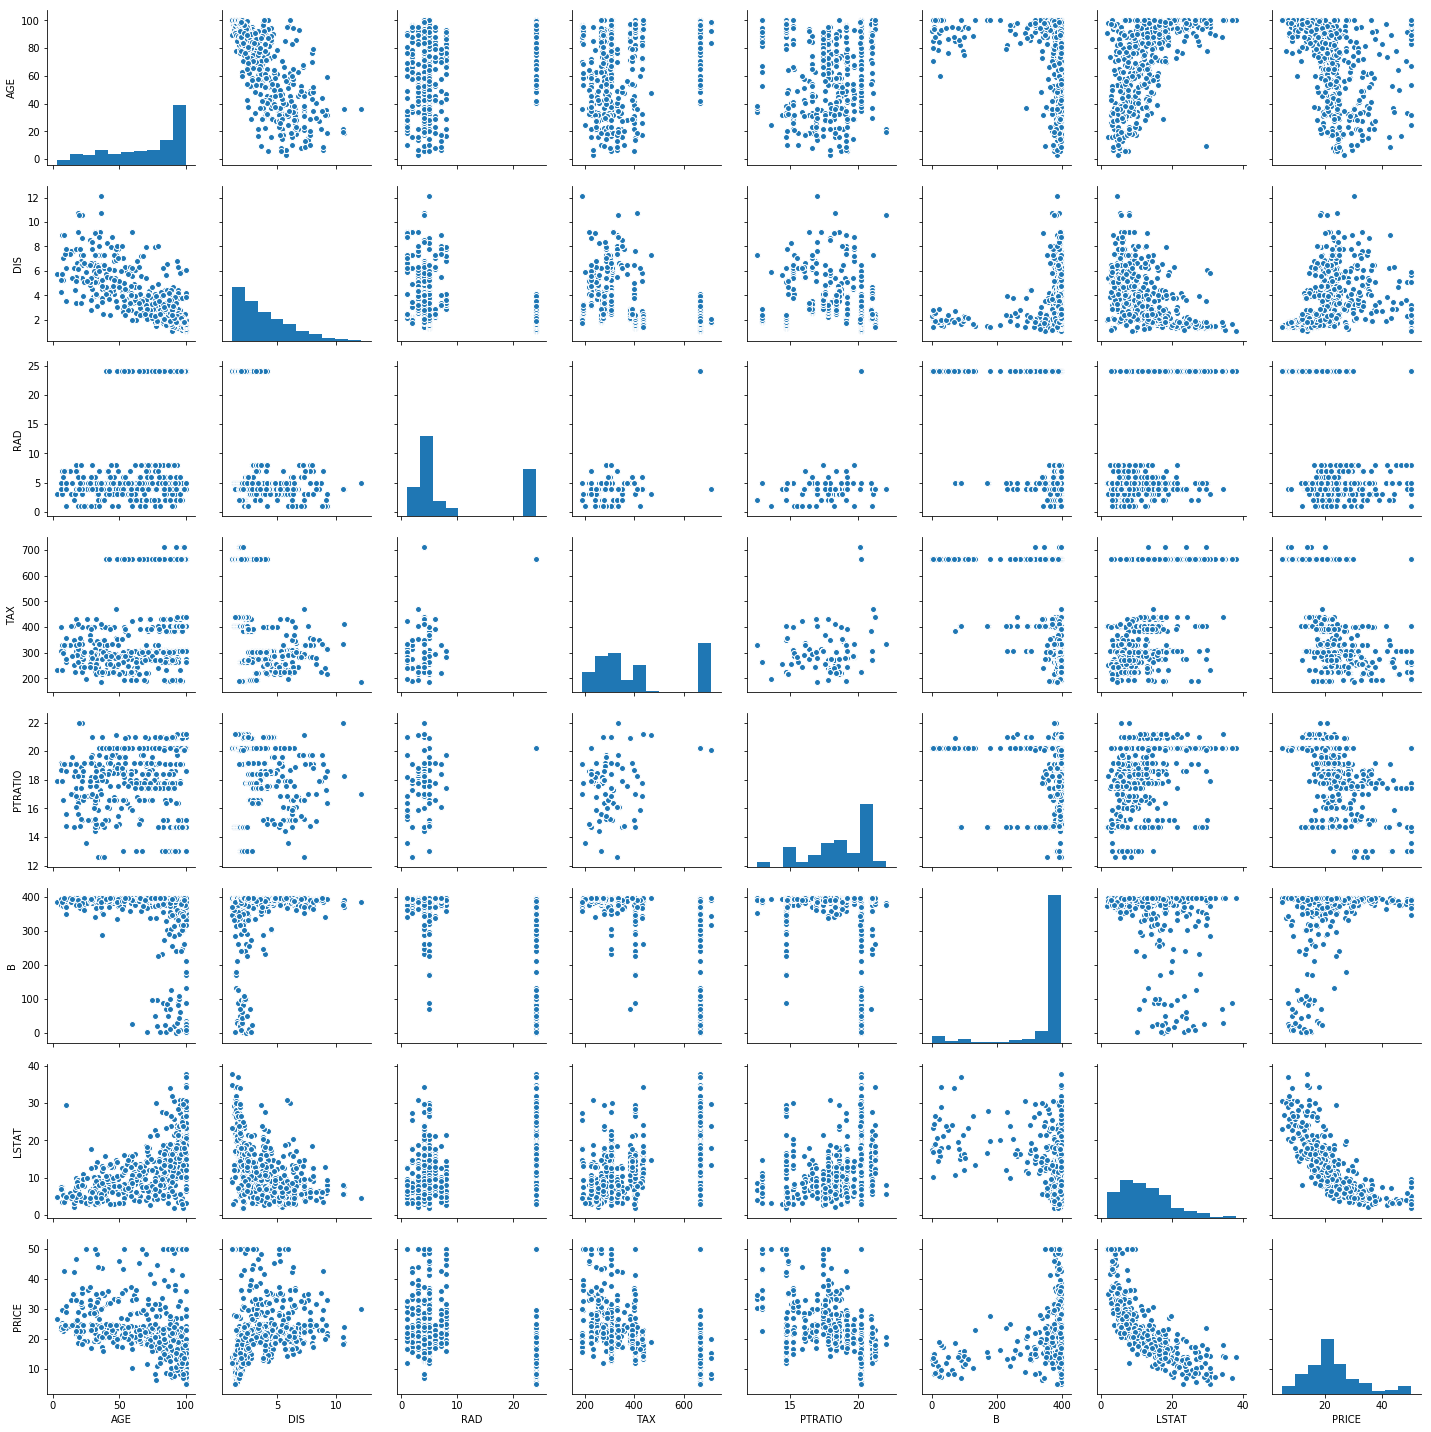

In [15]:
# To understand the correlation between Independent and Dependent variables

sns.pairplot(boston_df[['AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'PRICE']])

C:\Users\roopa\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


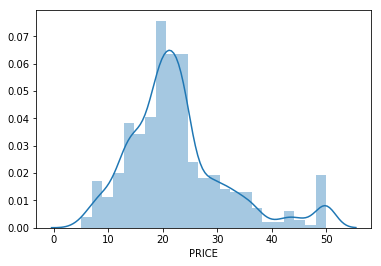

In [16]:
# To understand the distribution of Target/Dependent variable

sns.distplot(boston_df['PRICE'])

In [17]:
#Correlation matrix

corr_mat = boston_df.corr()
corr_mat

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.000000,-0.199458,0.404471,-0.055295,0.417521,-0.219940,0.350784,-0.377904,0.622029,0.579564,0.288250,-0.377365,0.452220,-0.385832
ZN,-0.199458,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.404471,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055295,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.417521,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219940,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.350784,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.377904,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.622029,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.579564,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


Text(0.5,1,'Correlations among the variables\n')

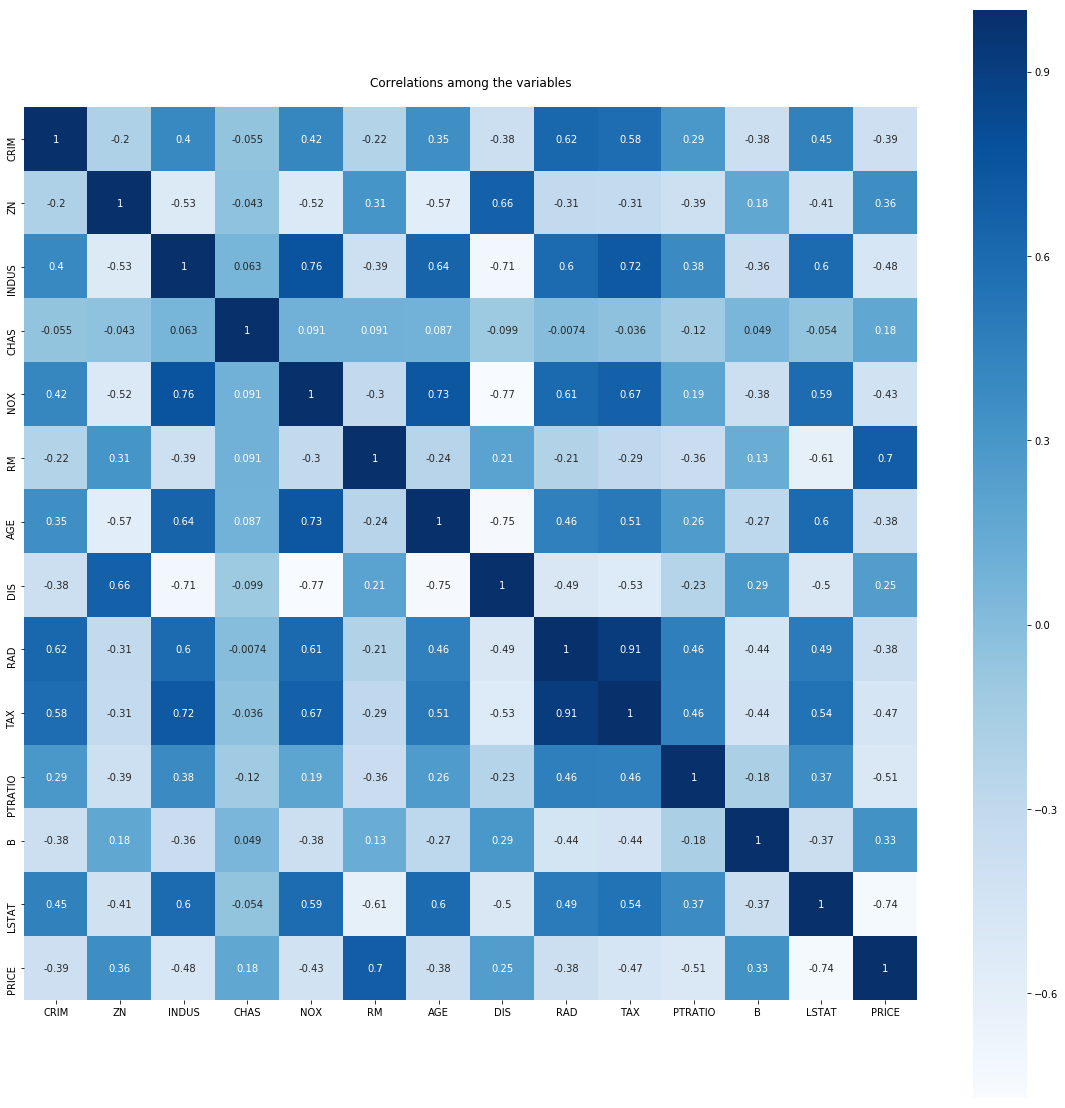

In [18]:
# Heatmap showing correlations among the variables

plt.figure(figsize=(20,20))

sns.heatmap(corr_mat, vmax=1, square=True, annot=True, cmap='Blues')

plt.title('Correlations among the variables\n')

In [19]:
boston_df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'PRICE'],
      dtype='object')

## Before Standardisation

In [20]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


# Standardise data

In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
boston_new = scaler.fit_transform(boston_df)

## After Standardisation

In [22]:
boston_temp = pd.DataFrame(boston_new, columns=boston_df.columns)
boston_temp.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,-0.417713,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562,0.159686
1,-0.415269,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439,-0.101524
2,-0.415272,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727,1.324247
3,-0.414680,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517,1.182758
4,-0.410409,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501,1.487503


# Split data into X, y

In [23]:
X = boston_new[:, :13]
y = boston_new[:, 13:]

# Train-Test-Split

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

In [26]:
X_train.shape

(354, 13)

In [27]:
y_train.shape

(354, 1)

In [28]:
X_test.shape

(152, 13)

In [29]:
y_test.shape

(152, 1)

# Creating and Training the Model

In [30]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

# Model Evaluation

In [31]:
# Intercept
lm.intercept_

array([0.01237441])

In [32]:
# Coefficients
lm.coef_

array([[-0.09605003,  0.07040057,  0.01526563,  0.07593419, -0.1969228 ,
         0.40544779, -0.03256955, -0.30043173,  0.24113213, -0.19557641,
        -0.22669562,  0.1192121 , -0.30068356]])

In [33]:
cols = boston_df.columns[0:13]
cols

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

**Interpreting the coefficients:**

- Holding all other features fixed, 1 unit increase in **CRIM** (per capita crime rate by town) is associated with a **decrease of $96.05** in house price.

- Holding all other features fixed, 1 unit increase in **ZN** (proportion of residential land zoned for lots over 25,000 sq.ft) is associated with an **increase of $70.401** in house price.

- Holding all other features fixed, 1 unit increase in **INDUS** (proportion of non-retail business acres per town) is associated with an **increase of $15.266** in house price.

- Holding all other features fixed, 1 unit increase in **CHAS** (Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)) is associated with an **increase of $75.934** in house price.

- Holding all other features fixed, 1 unit increase in **NOX** (nitrogen oxides concentration (parts per 10 million)) is associated with n **decrease of $196.923** in house price.

- Holding all other features fixed, 1 unit increase in **RM** (average number of rooms per dwelling) is associated with an **increase of $405.448** in house price.

- Holding all other features fixed, 1 unit increase in **AGE** (proportion of owner-occupied units built prior to 1940) is associated with a **decrease of $32.57** in house price.

- Holding all other features fixed, 1 unit increase in **DIS** (weighted mean of distances to five Boston employment centres) is associated with a **decrease of $300.432** in house price.

- Holding all other features fixed, 1 unit increase in **RAD** (index of accessibility to radial highways) is associated with an **increase of $241.132** in house price.

- Holding all other features fixed, 1 unit increase in **TAX** (full-value property-tax rate per $10,000) is associated with a **decrease of $195.576** in house price.

- Holding all other features fixed, 1 unit increase in **PTRATIO** (pupil-teacher ratio by town) is associated with a **decrease of $226.696** in house price.

- Holding all other features fixed, 1 unit increase in **B** (1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town) is associated with an **increase of $119.212** in house price.

- Holding all other features fixed, 1 unit increase in **LSTAT** ( lower status of the population (percent)) is associated with a **decrease of \$300.684** in house price.


# Predictions from our Model

In [34]:
predictions = lm.predict(X_test)

Text(0,0.5,'predicted values')

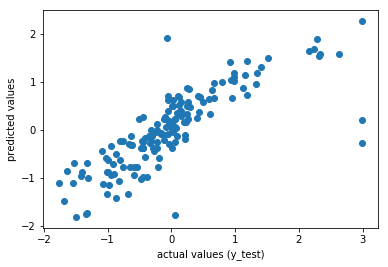

In [35]:
plt.scatter(y_test, predictions)
plt.xlabel('actual values (y_test)')
plt.ylabel('predicted values')

### Residuals plot

C:\Users\roopa\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


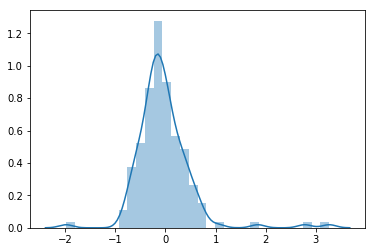

In [36]:
# Residuals or errors = actual values - predicted values

sns.distplot((y_test - predictions))


##### Observation: 
When residuals are normally distributed then the model is the right choice for the dataset

## Regression Evaluation Metrics


Here are three common evaluation metrics for regression problems:

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are **loss functions**, because we want to minimize them.

In [37]:
from sklearn import metrics

In [38]:
print('MAE:', round(metrics.mean_absolute_error(y_test, predictions), 2))
print('MSE:', round(metrics.mean_squared_error(y_test, predictions), 2))
print('RMSE:', round(np.sqrt(metrics.mean_squared_error(y_test, predictions)), 2))

MAE: 0.36
MSE: 0.3
RMSE: 0.55
